In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'Financial Analytics data.csv'
df = pd.read_csv(file)

In [4]:
print(df)

     S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore  Unnamed: 4
0        1   Reliance Inds.        583436.72           99810.00         NaN
1        2              TCS        563709.84           30904.00         NaN
2        3        HDFC Bank        482953.59           20581.27         NaN
3        4              ITC        320985.27            9772.02         NaN
4        5          H D F C        289497.37           16840.51         NaN
..     ...              ...              ...                ...         ...
483    496  Lak. Vilas Bank          3029.57             790.17         NaN
484    497            NOCIL          3026.26             249.27         NaN
485    498    Orient Cement          3024.32             511.53         NaN
486    499  Natl.Fertilizer          3017.07            2840.75         NaN
487    500        L T Foods              NaN                NaN         NaN

[488 rows x 5 columns]


In [5]:
df.drop(columns=['Unnamed: 4'], inplace=True)

In [6]:
print(df)

     S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore
0        1   Reliance Inds.        583436.72           99810.00
1        2              TCS        563709.84           30904.00
2        3        HDFC Bank        482953.59           20581.27
3        4              ITC        320985.27            9772.02
4        5          H D F C        289497.37           16840.51
..     ...              ...              ...                ...
483    496  Lak. Vilas Bank          3029.57             790.17
484    497            NOCIL          3026.26             249.27
485    498    Orient Cement          3024.32             511.53
486    499  Natl.Fertilizer          3017.07            2840.75
487    500        L T Foods              NaN                NaN

[488 rows x 4 columns]


In [7]:
print(df.isnull().sum())

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64


In [14]:
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].mean(), inplace=True)
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].mean(), inplace=True)

In [17]:
print(df.isnull().sum())

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64


In [34]:
print(df.to_string())

     S.No              Name  Mar_Cap_Crore  Sales_Qtr_Crore
0       1    Reliance Inds.  583436.720000     99810.000000
1       2               TCS  563709.840000     30904.000000
2       3         HDFC Bank  482953.590000     20581.270000
3       4               ITC  320985.270000      9772.020000
4       5           H D F C  289497.370000     16840.510000
5       6    Hind. Unilever  288265.260000      8590.000000
6       7     Maruti Suzuki  263493.810000     19283.200000
7       8           Infosys  248320.350000     17794.000000
8       9           O N G C  239981.500000     22995.880000
9      10    St Bk of India  232763.330000     57014.080000
10     11        ICICI Bank  203802.350000     13665.350000
11     12   Kotak Mah. Bank  199253.770000      6390.710000
12     13        Coal India  192677.980000     21643.280000
13     14   Larsen & Toubro  180860.740000     28747.450000
14     15           I O C L  178017.480000    110666.930000
15     16     Bharti Airtel  167131.2900

In [18]:
print(df.describe())

            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  488.000000       488.000000         488.000000
mean   251.508197     28043.857119        4395.976849
std    145.884078     58912.585788        9589.680655
min      1.000000      3017.070000          47.240000
25%    122.750000      4879.612500         725.732500
50%    252.500000     10380.425000        2095.335000
75%    378.250000     25502.085000        4395.976849
max    500.000000    583436.720000      110666.930000


C:\Users\venna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

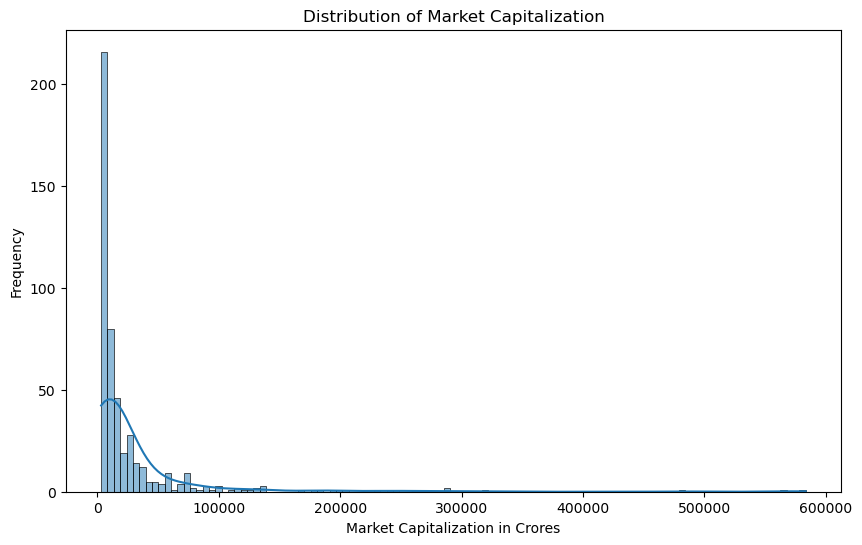

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(df['Mar Cap - Crore'],kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization in Crores')
plt.ylabel('Frequency')

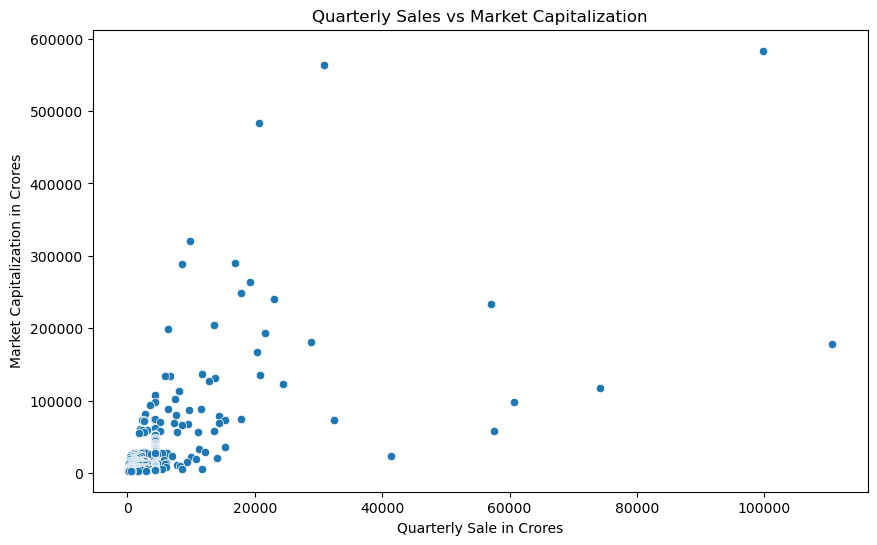

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=df)
plt.title('Quarterly Sales vs Market Capitalization')
plt.xlabel('Quarterly Sale in Crores')
plt.ylabel('Market Capitalization in Crores');

In [23]:
mean_market_cap = df['Mar Cap - Crore'].mean()
median_market_cap = df['Mar Cap - Crore'].median()
std_market_cap = df['Mar Cap - Crore'].std()

In [24]:
print(f"Mean Market Capitalization: {mean_market_cap}")
print(f"Median Market Capitalization: {median_market_cap}")
print(f"Standard Deviation of Market Capitalization: {std_market_cap}")

Mean Market Capitalization: 28043.857118997912
Median Market Capitalization: 10380.425
Standard Deviation of Market Capitalization: 58912.585787924545


Text(0.5, 1.0, 'Correlation Matrix')

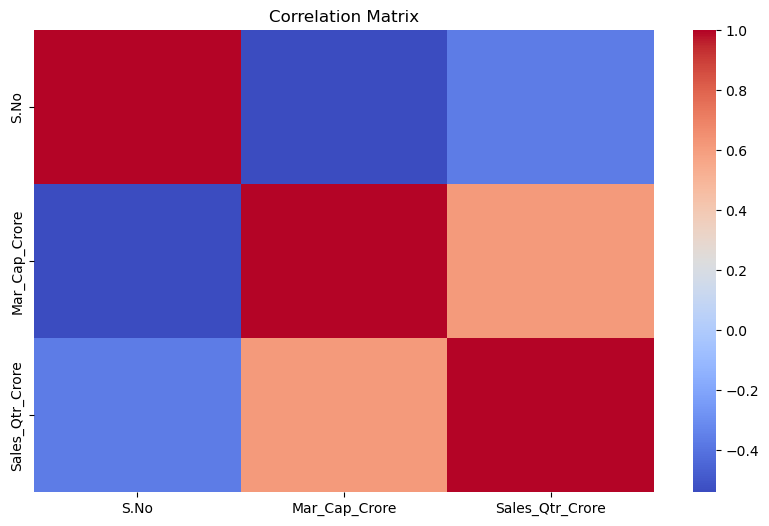

In [36]:

numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title('Correlation Matrix')

In [31]:
with open('key_metrics.txt', 'w') as f:
    f.write(f"Mean Market Capitalization: {mean_market_cap}\n")
    f.write(f"Median Market Capitalization: {median_market_cap}\n")
    f.write(f"Standard Deviation of Market Capitalization: {std_market_cap}\n")

df.to_csv('cleaned_market_capitalization.csv', index=False)

In [32]:
print("Data types before cleaning:\n", df.dtypes)

Data types before cleaning:
 S.No                 int64
Name                object
Mar_Cap_Crore      float64
Sales_Qtr_Crore    float64
dtype: object
